### Lab 7: Higgs Classification

In [2]:
import pickle
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("lab5/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab5/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


## 1) Make a stacked histogram plot for the feature variable: mass

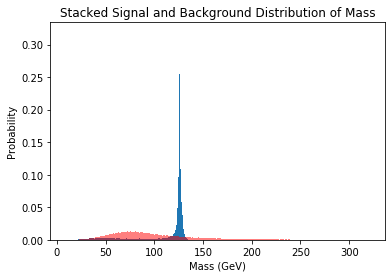

In [2]:
plt.hist(higgs['mass'], 500, density=True)
plt.hist(qcd['mass'], 500, color='red', alpha=.5, density=True)
plt.title('Stacked Signal and Background Distribution of Mass')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# a. Evaluate expected significance without any event selection

In [3]:
lenMass = len(qcd['mass'])
meanBG = np.mean(qcd['mass'])
prob = stats.poisson.cdf(125, meanBG) # x signal is eyeballed to 125
sigma = stats.norm.ppf(prob)
print('The signal of 125 is ', sigma, '\N{greek small letter sigma}')

lenSigMass = len(higgs['mass'])
NBG = 20000
NSig = 100
value = NSig / math.sqrt(NBG)
print('length of signal / square root of length of background = ', value)

The signal of 125 is  2.70499414329355 σ
length of signal / square root of length of background =  0.7071067811865475


The significance values and this calculated ratio are off by a about 2$\sigma$

## 2) Identify mass cuts to optimize the expected significance.

# a. Try different mass cuts systematically

normalize to 1 and then multiply by N(200000, 100) and then cut off and left and right of signal.

92.29381109781497
6378.509854716229


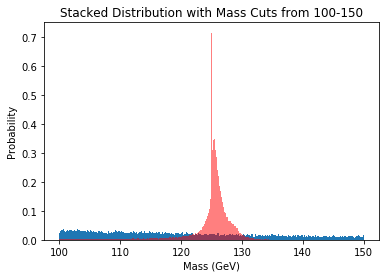

90.31262404434749
3800.3339695553314


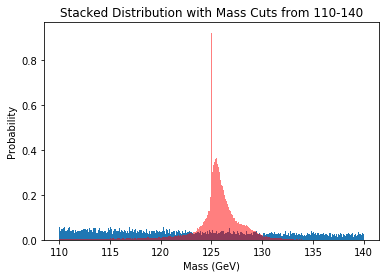

83.00890954720091
1250.8184396010806


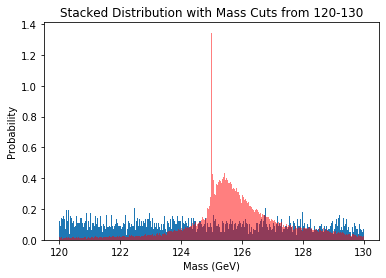

In [5]:
total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 150 and qcd['mass'][i] > 100):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 150 and higgs['mass'][i] > 100):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg1 = newNorm
sig1 = newNormSig

plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 100-150')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()



total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 140 and qcd['mass'][i] > 110):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 140 and higgs['mass'][i] > 110):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg2 = newNorm
sig2 = newNormSig

plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 110-140')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()



total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 130 and qcd['mass'][i] > 120):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 130 and higgs['mass'][i] > 120):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg3 = newNorm
sig3 = newNormSig

plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# b. Evaluate expected significance for each set of mass cuts

Mass cut from 100-150:
Nhiggs = 92.29, Nqcd = 6378.51
significance = Nhiggs/sqrt(Nqcd) = 1.16

Mass cut from 110-140:
Nhiggs = 90.32, Nqcd = 3800.34
significance = Nhiggs/sqrt(Nqcd) = 1.47

Mass cut from 120-130:
Nhiggs = 83.01, Nqcd = 1250.81
significance = Nhiggs/sqrt(Nqcd) = 2.35

# c. Identify the set of the mass cuts which give you the highest significance.

The method with which I went about performing these mass cuts largely revolved around ormalizing my dataset. I am working with the lowPT dataset and so my Nhiggs = 100 while my Nqcd = 20,000 and so my initial significance (Nhiggs/sqrt(Nqcd)) = .71. This is a pretty low significance compared to the expected significance of 2.70 we calculated without event selection and so I needed to perform mass cuts to eliminate as much background as I could to isolate the signal and get a higher signficance reading. To do this I took the 'total' of all the values in 'qcd' so that I would have a value to normalize with. Then, I iterated through every value in 'qcd' and discovered which of them were within my accepted boundary of values for my mass cut (100-150, 110-140, and 120-130. I determined these mass cut values by looking at the graph and understanding that the signal data was around 125 so that I should cut around it. I systematially decreased the sensitivity by 20 each time I took a mass cut to observe the patterns that occur with it.) and put these values in a 'newNorm' list. Then I went through every value in the 'newNorm' and divided it by 'total' to normalize each data point and then multiplied every value by 20,000 to normalize it to 20,000. Then I added these values up to get the new Nqcd and I repeated this process for Nhiggs but normalized to 100 instead.

I performed these processes to find the above listed significance values and found that the more sensitive testing of 120-130 gave me the highest signficance of 2.35 and this value was the closest to my expected value of 2.70.

## 3) Make stacked histogram plots for the rest of features

# a. Set A of plots without any event selection

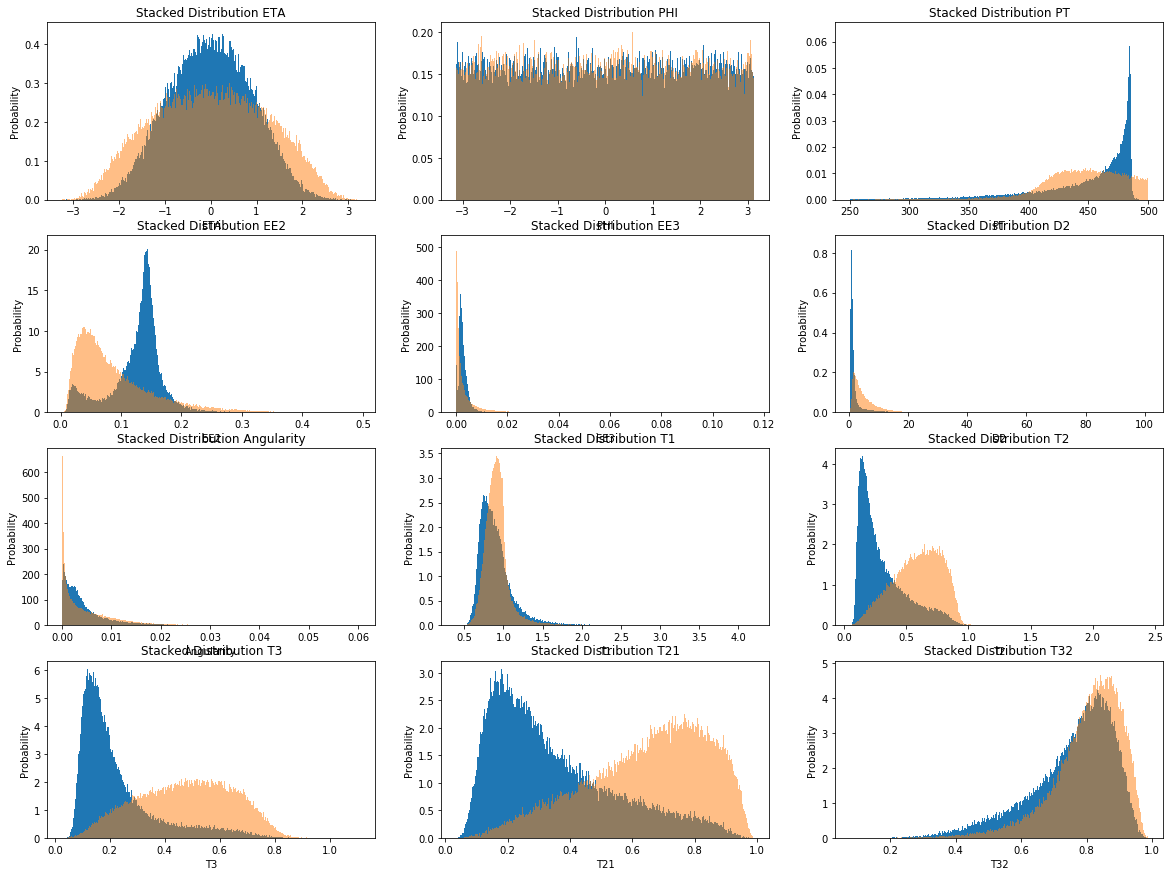

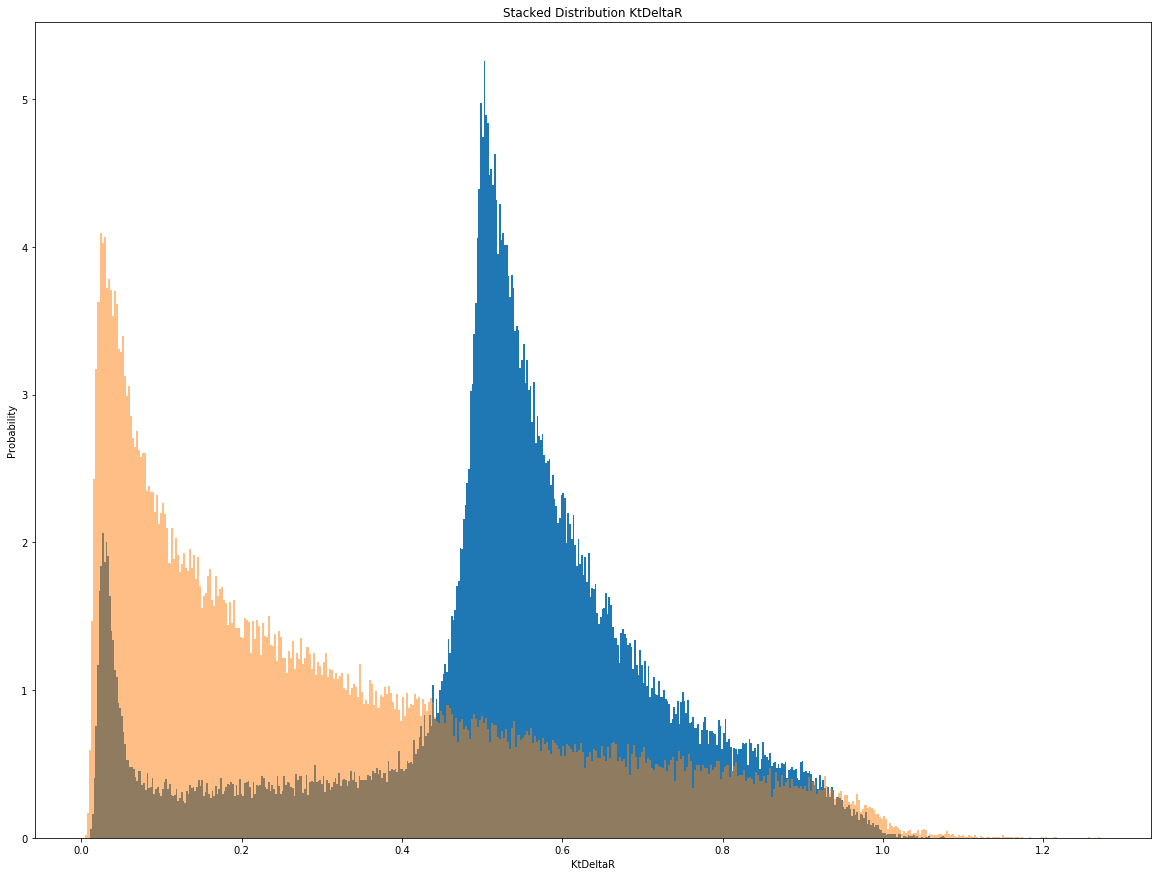

In [8]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(4, 3)
ax[0][0].hist(higgs['eta'], 500, density=True)
ax[0][0].hist(qcd['eta'], 500, density=True, alpha=.5)
ax[0][0].set_title('Stacked Distribution ETA')
ax[0][0].set_ylabel('Probability')
ax[0][0].set_xlabel('ETA')
ax[0][1].hist(higgs['phi'], 500, density=True)
ax[0][1].hist(qcd['phi'], 500, density=True, alpha=.5)
ax[0][1].set_title('Stacked Distribution PHI')
ax[0][1].set_ylabel('Probability')
ax[0][1].set_xlabel('PHI')
ax[0][2].hist(higgs['pt'], 500, density=True)
ax[0][2].hist(qcd['pt'], 500, density=True, alpha=.5)
ax[0][2].set_title('Stacked Distribution PT')
ax[0][2].set_ylabel('Probability')
ax[0][2].set_xlabel('PT')

ax[1][0].hist(higgs['ee2'], 500, density=True)
ax[1][0].hist(qcd['ee2'], 500, density=True, alpha=.5)
ax[1][0].set_title('Stacked Distribution EE2')
ax[1][0].set_ylabel('Probability')
ax[1][0].set_xlabel('EE2')
ax[1][1].hist(higgs['ee3'], 500, density=True)
ax[1][1].hist(qcd['ee3'], 500, density=True, alpha=.5)
ax[1][1].set_title('Stacked Distribution EE3')
ax[1][1].set_ylabel('Probability')
ax[1][1].set_xlabel('EE3')
ax[1][2].hist(higgs['d2'], 500, density=True)
ax[1][2].hist(qcd['d2'], 500, density=True, alpha=.5)
ax[1][2].set_title('Stacked Distribution D2')
ax[1][2].set_ylabel('Probability')
ax[1][2].set_xlabel('D2')

ax[2][0].hist(higgs['angularity'], 500, density=True)
ax[2][0].hist(qcd['angularity'], 500, density=True, alpha=.5)
ax[2][0].set_title('Stacked Distribution Angularity')
ax[2][0].set_ylabel('Probability')
ax[2][0].set_xlabel('Angularity')
ax[2][1].hist(higgs['t1'], 500, density=True)
ax[2][1].hist(qcd['t1'], 500, density=True, alpha=.5)
ax[2][1].set_title('Stacked Distribution T1')
ax[2][1].set_ylabel('Probability')
ax[2][1].set_xlabel('T1')
ax[2][2].hist(higgs['t2'], 500, density=True)
ax[2][2].hist(qcd['t2'], 500, density=True, alpha=.5)
ax[2][2].set_title('Stacked Distribution T2')
ax[2][2].set_ylabel('Probability')
ax[2][2].set_xlabel('T2')

ax[3][0].hist(higgs['t3'], 500, density=True)
ax[3][0].hist(qcd['t3'], 500, density=True, alpha=.5)
ax[3][0].set_title('Stacked Distribution T3')
ax[3][0].set_ylabel('Probability')
ax[3][0].set_xlabel('T3')
ax[3][1].hist(higgs['t21'], 500, density=True)
ax[3][1].hist(qcd['t21'], 500, density=True, alpha=.5)
ax[3][1].set_title('Stacked Distribution T21')
ax[3][1].set_ylabel('Probability')
ax[3][1].set_xlabel('T21')
ax[3][2].hist(higgs['t32'], 500, density=True)
ax[3][2].hist(qcd['t32'], 500, density=True, alpha=.5)
ax[3][2].set_title('Stacked Distribution T32')
ax[3][2].set_ylabel('Probability')
ax[3][2].set_xlabel('T32')
plt.show()

plt.hist(higgs['KtDeltaR'], 500, density=True)
plt.hist(qcd['KtDeltaR'], 500, density=True, alpha=.5)
plt.title('Stacked Distribution KtDeltaR')
plt.ylabel('Probability')
plt.xlabel('KtDeltaR')
plt.show()

A feature that will be as discriminative as the mass feature is D2 because as we make more cuts the decrease in Nqcd will be much larger than that of Nhiggs so when we input these values into our significance equation (Nhiggs/sqrt(Nqcd)) it will be as large or greater than mass.

8.560354433692762
29.957971582044376


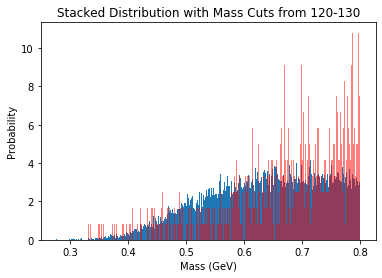

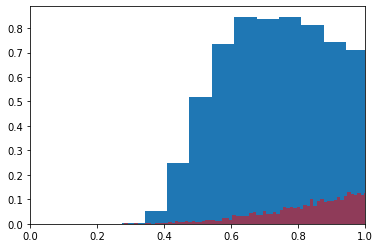

In [30]:
total = sum(qcd['d2'])
totalSig = sum(higgs['d2'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['d2'])):
    if(qcd['d2'][i] < .8 and qcd['d2'][i] > 0):
        newArr1.append(qcd['d2'][i])
    if(higgs['d2'][i] < .8 and higgs['d2'][i] > 0):
        newSig1.append(higgs['d2'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 0-.8')
plt.xlabel('D2')
plt.ylabel('Probability')
plt.show()

plt.hist(higgs['d2'], 500, density=True)
plt.hist(qcd['d2'], 10000, density=True, color='red', alpha=.5)
plt.xlim(0, 1)
plt.show()

# b. Set B of plots with your optimal mass cuts

48.06028203591083
4184.6308842865665


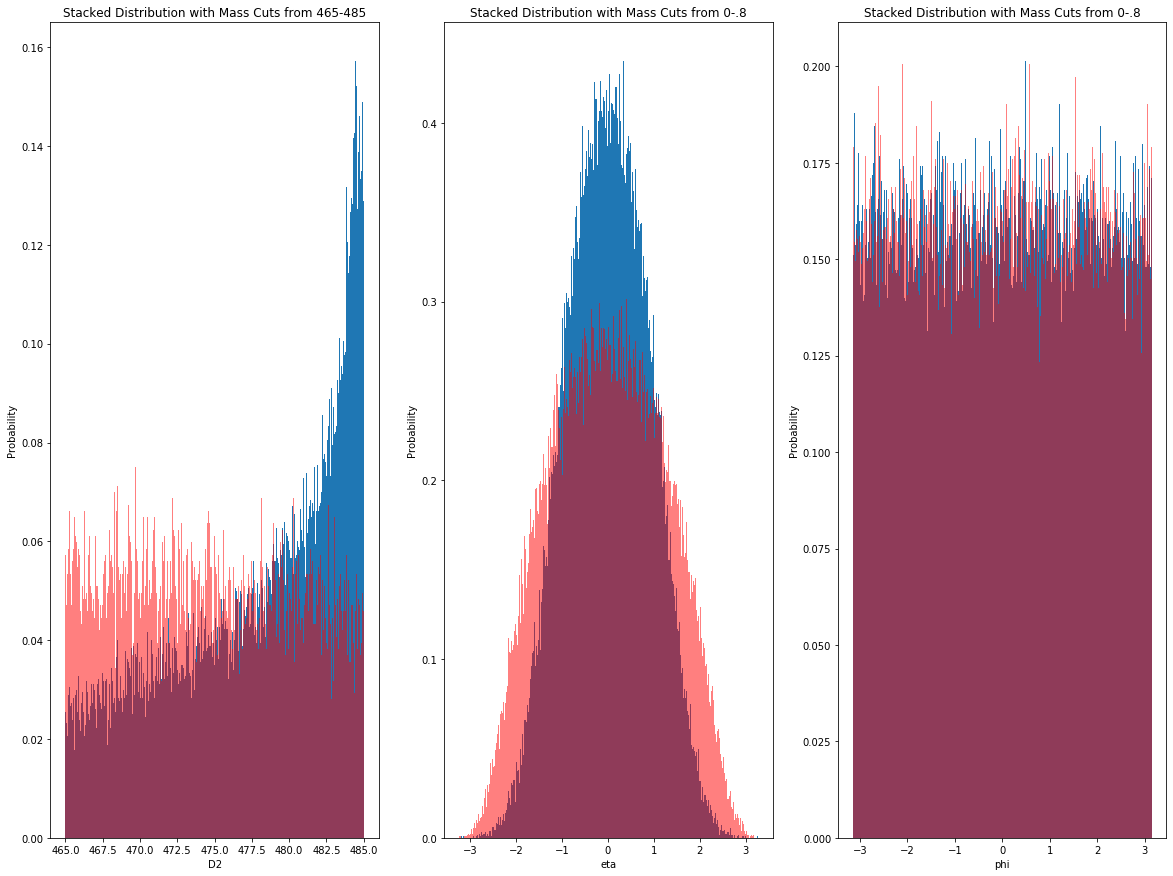

In [38]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 3)
var = 'pt'
total = sum(qcd[var])
totalSig = sum(higgs[var])
newArr1 = []
newSig1 = []
for i in range(len(qcd[var])):
    if(qcd[var][i] < 485 and qcd[var][i] > 465):
        newArr1.append(qcd[var][i])
    if(higgs[var][i] < 485 and higgs[var][i] > 465):
        newSig1.append(higgs[var][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg1 = sum(newNorm)
sig1 = sum(newNormSig)

ax[0].hist(newSig1, 500, density=True)
ax[0].hist(newArr1, 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
ax[0].set_title('Stacked Distribution with Mass Cuts from 465-485')
ax[0].set_xlabel('pt')
ax[0].set_ylabel('Probability')


bg2 = 20000
sig2 = 100

ax[1].hist(higgs['eta'], 500, density=True)
ax[1].hist(qcd['eta'], 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
ax[1].set_title('Stacked Distribution with Mass Cuts from 0-.8')
ax[1].set_xlabel('eta')
ax[1].set_ylabel('Probability')


bg3 = 20000
sig3 = 100

ax[2].hist(higgs['phi'], 500, density=True)
ax[2].hist(qcd['phi'], 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
ax[2].set_title('Stacked Distribution with Mass Cuts from 0-.8')
ax[2].set_xlabel('phi')
ax[2].set_ylabel('Probability')
plt.show()

In [43]:
print('Significance of pt: ', sig1/(bg1**.5))
print('Significance of eta: ', sig2/(bg2**.5))
print('Significance of phi: ', sig3/(bg3**.5))

Significance of pt:  0.7429468352722259
Significance of eta:  0.7071067811865475
Significance of phi:  0.7071067811865475


86.6962078051895
7748.93495126385


58.363286883363266
5022.0671797687755


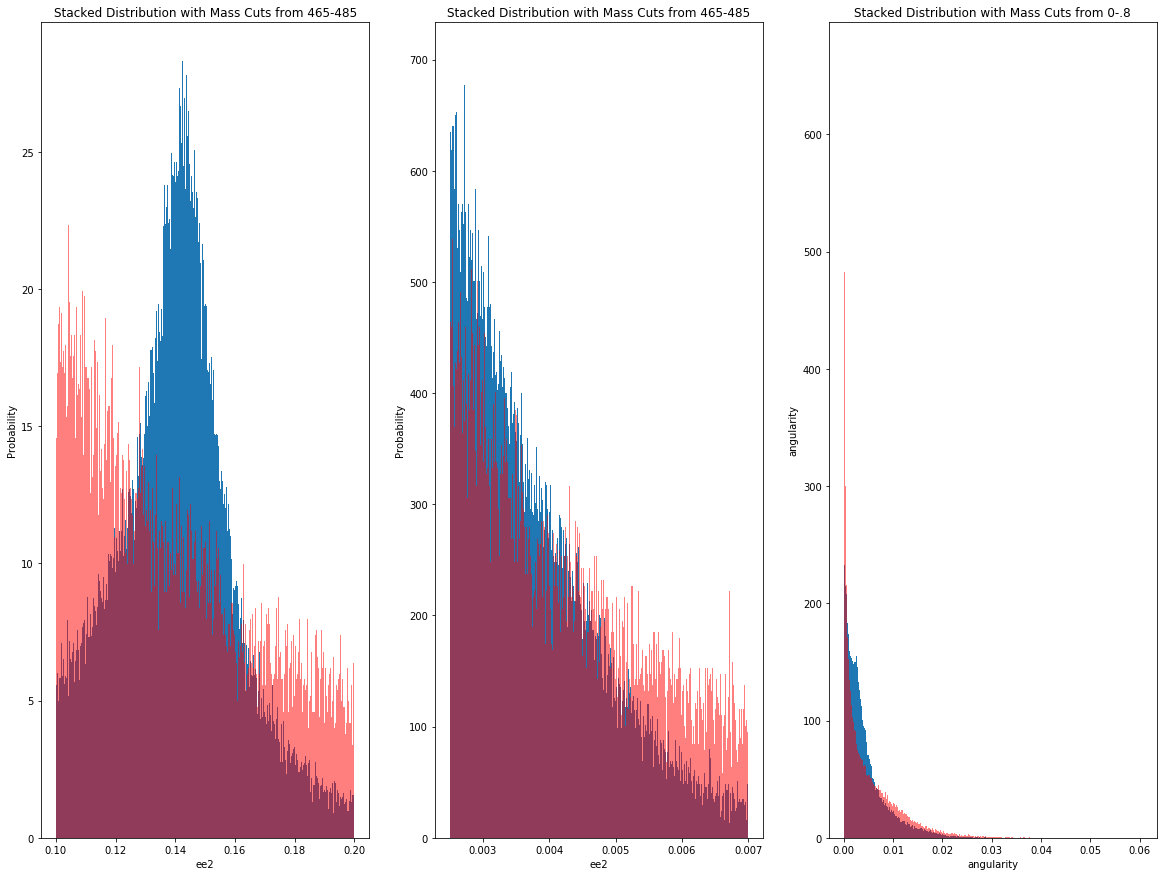

In [44]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 3)
var = 'ee2'
total = sum(qcd[var])
totalSig = sum(higgs[var])
newArr1 = []
newSig1 = []
for i in range(len(qcd[var])):
    if(qcd[var][i] < .2 and qcd[var][i] > .1):
        newArr1.append(qcd[var][i])
    if(higgs[var][i] < .2 and higgs[var][i] > .1):
        newSig1.append(higgs[var][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg1 = sum(newNorm)
sig1 = sum(newNormSig)

ax[0].hist(newSig1, 500, density=True)
ax[0].hist(newArr1, 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
ax[0].set_title('Stacked Distribution with Mass Cuts from 465-485')
ax[0].set_xlabel('ee2')
ax[0].set_ylabel('Probability')


var = 'ee3'
total = sum(qcd[var])
totalSig = sum(higgs[var])
newArr1 = []
newSig1 = []
for i in range(len(qcd[var])):
    if(qcd[var][i] < .007 and qcd[var][i] > .0025):
        newArr1.append(qcd[var][i])
    if(higgs[var][i] < .007 and higgs[var][i] > .0025):
        newSig1.append(higgs[var][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newSig1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

bg2 = sum(newNorm)
sig2 = sum(newNormSig)

ax[1].hist(newSig1, 500, density=True)
ax[1].hist(newArr1, 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
ax[1].set_title('Stacked Distribution with Mass Cuts from 465-485')
ax[1].set_xlabel('ee2')
ax[1].set_ylabel('Probability')


bg3 = 20000
sig3 = 100

ax[2].hist(higgs['angularity'], 500, density=True)
ax[2].hist(qcd['angularity'], 500, density=True, color='red', alpha=.5)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
ax[2].set_title('Stacked Distribution with Mass Cuts from 0-.8')
ax[2].set_xlabel('angularity')
ax[2].set_ylabel('angularity')
plt.show()

In [46]:
print('Significance of ee2: ', sig1/(bg1**.5))
print('Significance of ee3: ', sig2/(bg2**.5))
print('Significance of angularity: ', sig3/(bg3**.5))

Significance of ee2:  0.984870419696705
Significance of ee3:  0.823566141150211
Significance of angularity:  0.7071067811865475


## 4) Optimize event selections using multiple features (if necessary)

# a. Find a set of feature cuts which can help you to achieve the best significance.

# b. Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

## 5) Bonus

# a. Plot 2-dimensional scattering plots between top two most discriminative features